In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-app-behaviour-analysis/top-screens.csv
/kaggle/input/customer-app-behaviour-analysis/app-analysis.csv


# Directing customers to subscription through app behaviour analysis

## Importing Data

### Load Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load Data

In [3]:
df = pd.read_csv('/kaggle/input/customer-app-behaviour-analysis/app-analysis.csv')
df_screens = pd.read_csv('/kaggle/input/customer-app-behaviour-analysis/top-screens.csv')

## Analyzing Data

### Playing with Data

In [4]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['hour'] = df.hour.str.slice(1, 3).astype(int)

In [7]:
dataset = df.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [8]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

## Visualizing Data

### Histogram

/tmp/ipykernel_20/2858317700.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


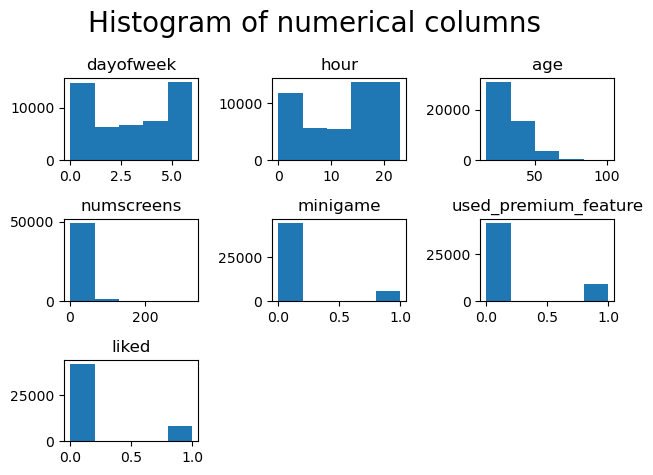

In [9]:
plt.suptitle('Histogram of numerical columns', fontsize=20)
for i in range(1, dataset.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset.columns.values[i-1])
    
    vals = np.size(dataset.iloc[i - 1].unique())
    plt.tight_layout()
    plt.hist(dataset.iloc[:, i-1], bins = vals)

### Correlation

<Axes: title={'center': 'Correlation with response'}>

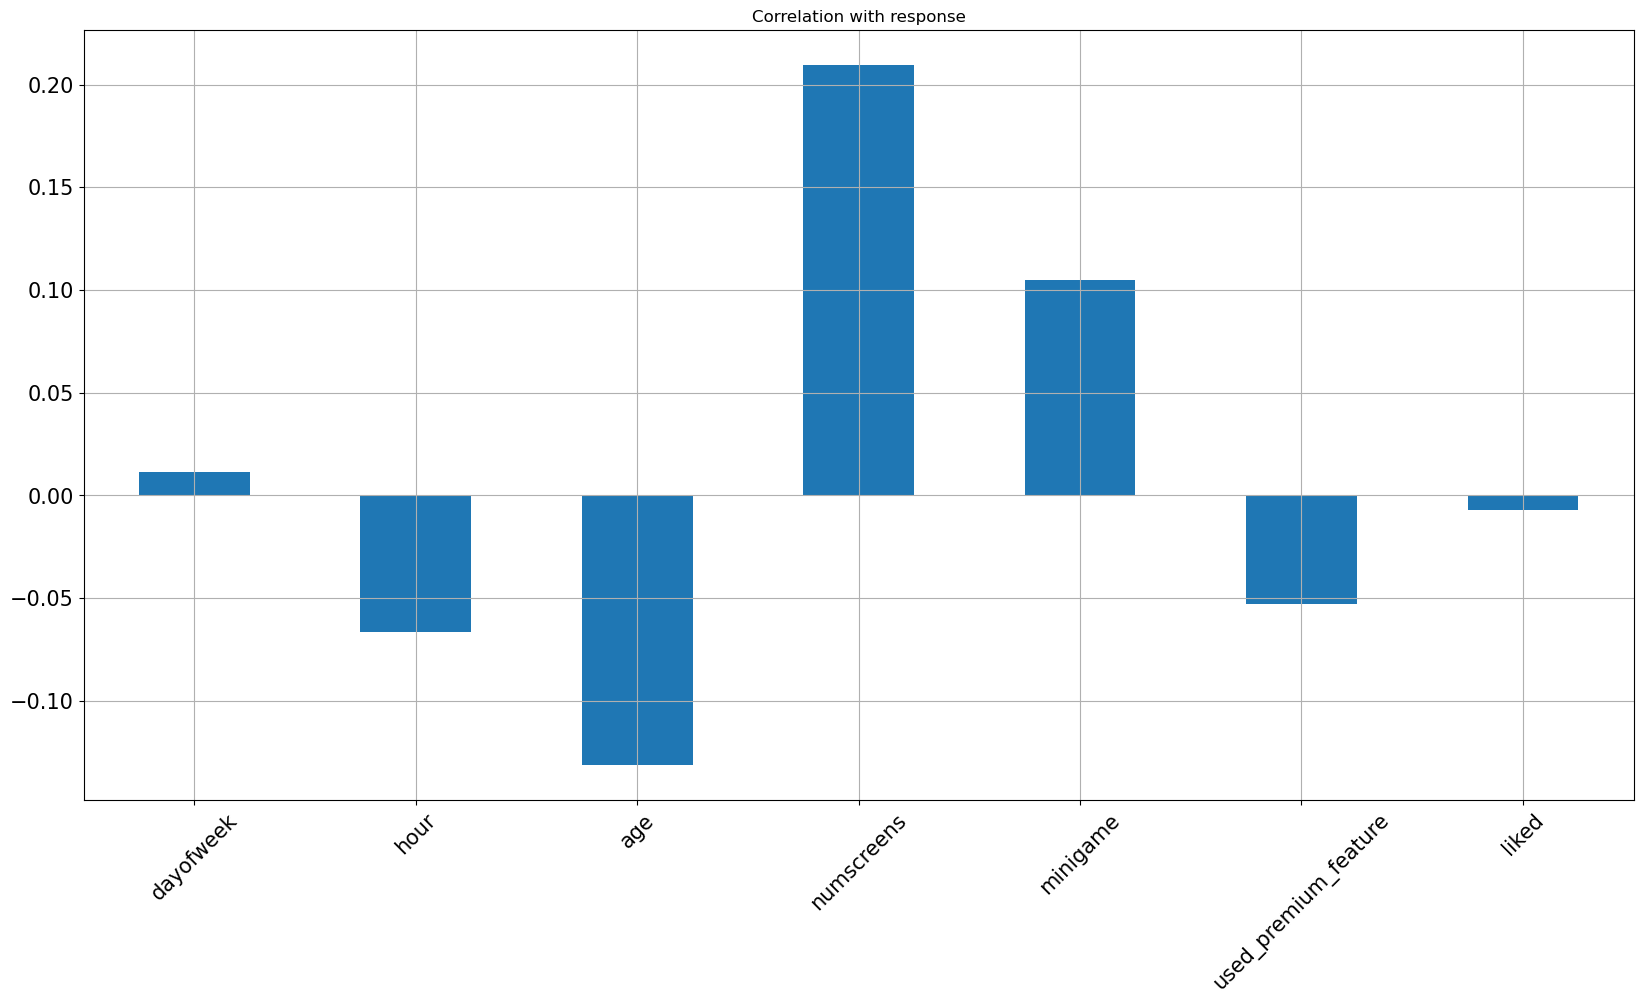

In [10]:
dataset.corrwith(df.enrolled).plot.bar(figsize = (20, 10),
                                      title = 'Correlation with response',
                                      fontsize = 15,
                                      rot = 45,
                                      grid = True)

### Correlation Matrix

/tmp/ipykernel_20/3819064361.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

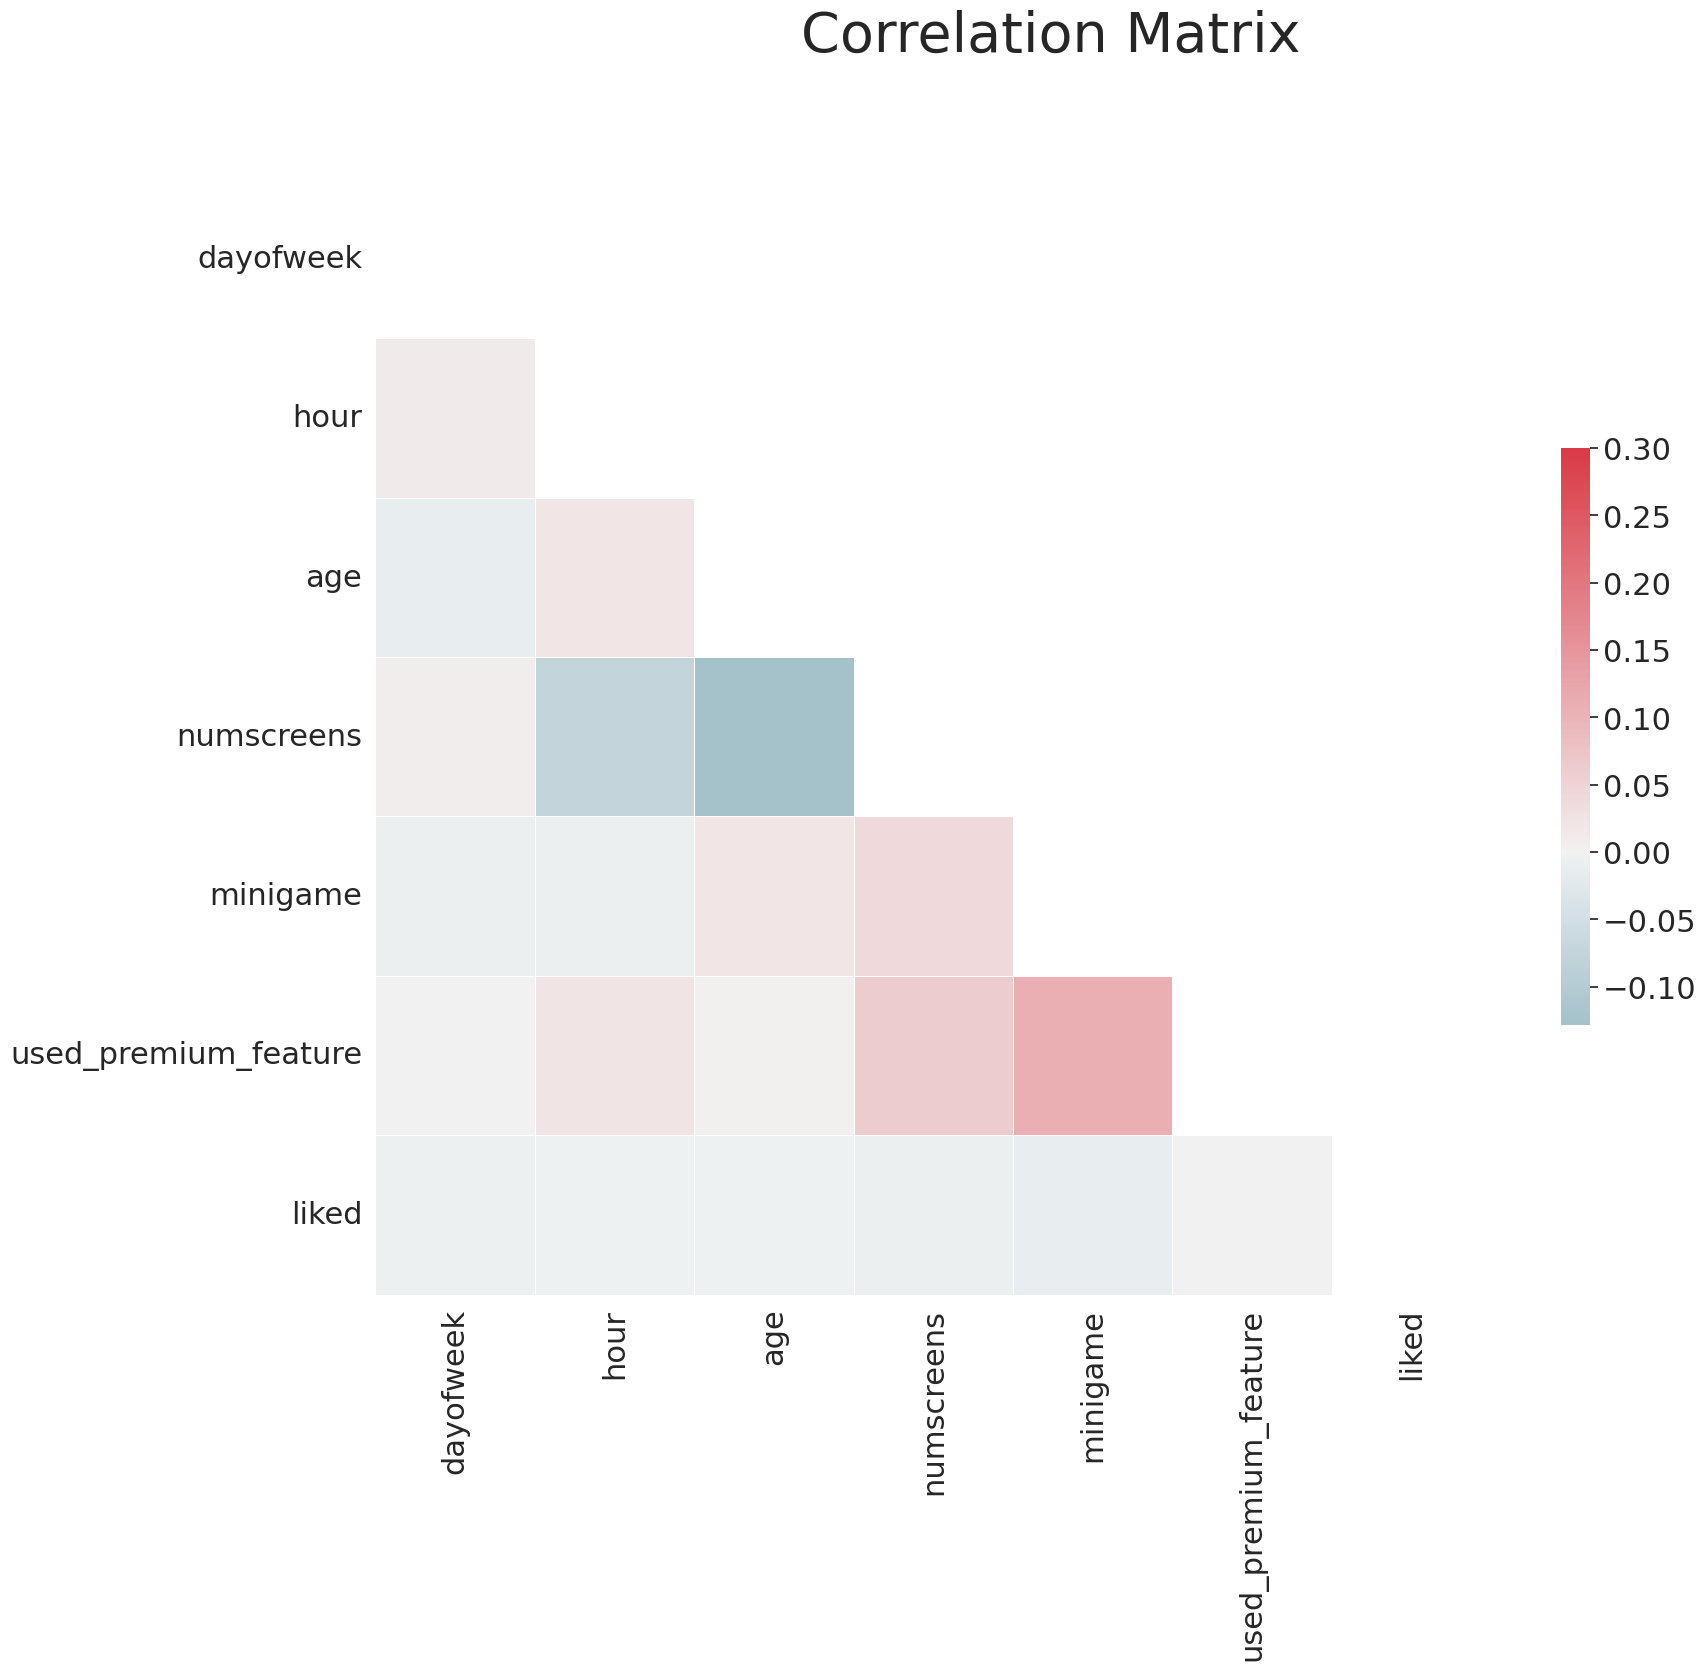

In [11]:
sns.set(style = 'white', font_scale = 2)
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, axes = plt.subplots(figsize = (18, 15))
fig.suptitle('Correlation Matrix', fontsize=40)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square = True, linewidths=.5, cbar_kws={'shrink': .5})

Strong correlations
1. More aged people, open less no. of screens
2. More no. of screens, atleast 1 might be a premium feature
3. If played minigame, possibility that used a premium feature

## Feature Engineering

### Play with dates

In [12]:
df['first_open'] = [parser.parse(row_data) for row_data in df['first_open']]
df['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data  for row_data in df['enrolled_date']]

In [13]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [14]:
## stores diff in time for enrollment and store in terms of hours
df['difference'] = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

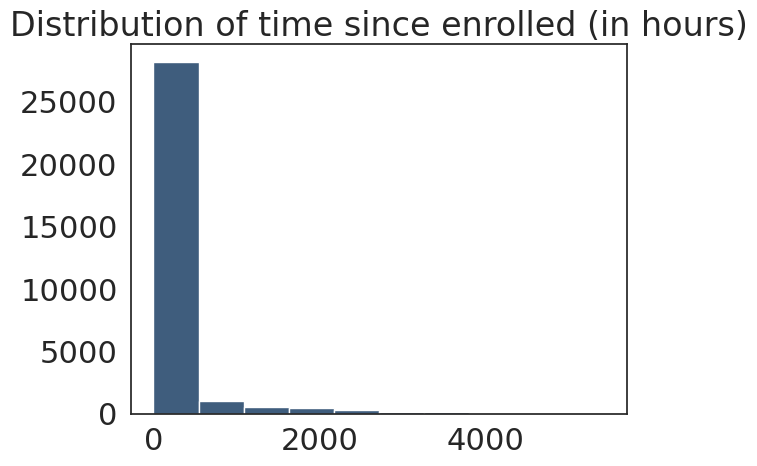

In [15]:
plt.hist(df['difference'].dropna(), color='#3f5d7d')
plt.title('Distribution of time since enrolled (in hours)')
plt.show()

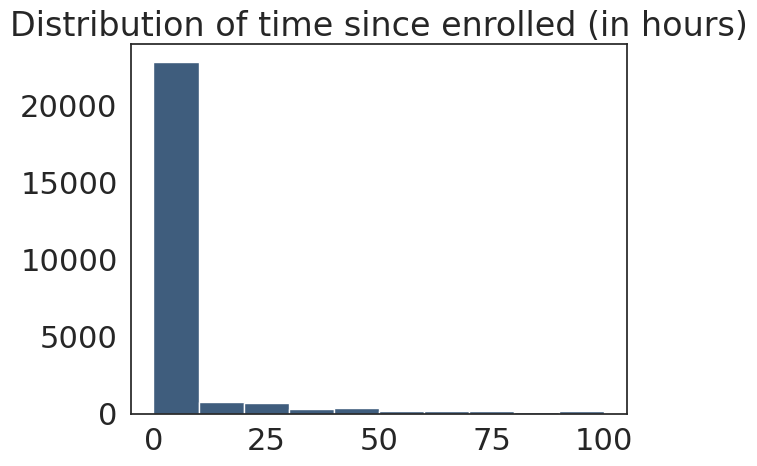

In [16]:
plt.hist(df['difference'].dropna(), color='#3f5d7d', range=[0, 100])
plt.title('Distribution of time since enrolled (in hours)')
plt.show()

In [17]:
df.loc[df.difference > 48, 'enrolled'] = 0

In [18]:
df = df.drop(columns = ['difference', 'enrolled_date', 'first_open'])

### Play with list of screens

In [19]:
top_screens = df_screens.top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [20]:
df['screen_list'] = df.screen_list.astype(str) + ','

for screen in top_screens:
    df[screen] = df.screen_list.str.contains(screen).astype(int)
    df['screen_list'] = df.screen_list.str.replace(screen+',', '')
df['Other'] = df.screen_list.str.count(',')
df = df.drop(columns = ['screen_list'])

In [21]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [22]:
def remove_common_screens(dataset, prefix: str, comb_col_name: str):
    screens_to_be_removed = []
    for screen in top_screens:
        if screen.startswith(prefix):
            screens_to_be_removed.append(screen)
    print(screens_to_be_removed)
    dataset[comb_col_name] = dataset[screens_to_be_removed].sum(axis = 1)
    return dataset.drop(columns = screens_to_be_removed)

In [23]:
df = remove_common_screens(df, 'Credit', 'CMCount')
df = remove_common_screens(df, 'CC', 'CCCount')
df = remove_common_screens(df, 'Loan', 'LoansCount')
df = remove_common_screens(df, 'Saving', 'SavingsCount')

['Credit3Container', 'Credit3Dashboard', 'Credit3', 'Credit1', 'Credit2']
['CC1Category', 'CC1', 'CC3']
['Loan2', 'Loan3', 'Loan', 'Loan4']
['Saving9', 'Saving1', 'Saving8', 'Saving10', 'Saving4', 'Saving7', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5']


In [24]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,CMCount,CCCount,LoansCount,SavingsCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,1,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,1,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,3,0,1,0
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,2,0,1,0


In [25]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other', 'CMCount',
       'CCCount', 'LoansCount', 'SavingsCount'],
      dtype='object')

## Model building

In [26]:
import time

### Data pre-processing

In [27]:
response = df['enrolled']
df.drop(columns = ['enrolled'])

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,CMCount,CCCount,LoansCount,SavingsCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,1,0
1,333588,6,1,24,13,0,0,0,1,1,...,0,0,0,0,0,5,0,0,1,0
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,6,3,0,1,0
4,51549,1,18,31,32,0,0,1,0,1,...,0,0,0,0,0,10,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,...,0,0,0,0,0,6,2,0,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,1,0,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,0,1,0,...,0,0,0,0,0,13,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df, response, test_size=0.2, random_state=0)

In [30]:
train_identifier = X_train['user']
X_train.drop(columns = ['user'])

test_identifier = X_test['user']
X_test.drop(columns = ['user'])

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,CMCount,CCCount,LoansCount,SavingsCount
11841,0,1,41,34,0,0,1,1,1,0,...,0,0,0,0,0,11,0,0,0,0
19602,5,6,26,30,0,0,1,0,1,0,...,0,0,0,0,0,9,0,0,1,0
45519,0,15,37,11,0,1,0,0,0,0,...,0,0,0,0,0,5,1,0,2,0
25747,5,19,21,13,0,0,1,1,0,0,...,0,0,0,0,0,8,0,0,0,0
42642,5,1,30,32,0,0,1,0,0,0,...,0,0,0,0,0,4,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25091,1,22,39,31,0,0,1,0,1,0,...,0,0,0,0,0,7,0,0,1,0
27853,0,12,34,15,0,0,1,0,0,0,...,0,0,0,0,0,9,0,0,1,0
47278,5,17,27,68,0,0,0,1,0,1,...,0,0,0,0,0,5,3,2,2,0
37020,1,3,21,25,0,0,1,0,1,0,...,0,0,0,0,0,9,0,0,0,0


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc_X = StandardScaler()

In [33]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

X_train2.columns = X_train.columns
X_test2.columns = X_test.columns

In [34]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [35]:
X_train = X_train2
X_test = X_test2

In [36]:
X_train.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,CMCount,CCCount,LoansCount,SavingsCount
20330,1.193341,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,-0.996108,2.246319,-1.039218,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.763372,-0.289185,1.785389,-0.260877
17532,-0.776427,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.996108,-0.445173,0.962262,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,0.057524,-0.289185,0.309800,-0.260877
45819,1.726909,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.996108,-0.445173,-1.039218,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,0.878421,1.336593,1.785389,-0.260877
34807,1.269491,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.996108,-0.445173,0.962262,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.763372,-0.289185,0.309800,-0.260877
31888,0.571812,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,1.003908,-0.445173,0.962262,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,0.878421,-0.289185,-1.165789,-0.260877


### Model Generation

In [37]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='liblinear')

In [38]:
classifier.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

## Model Evaluation

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

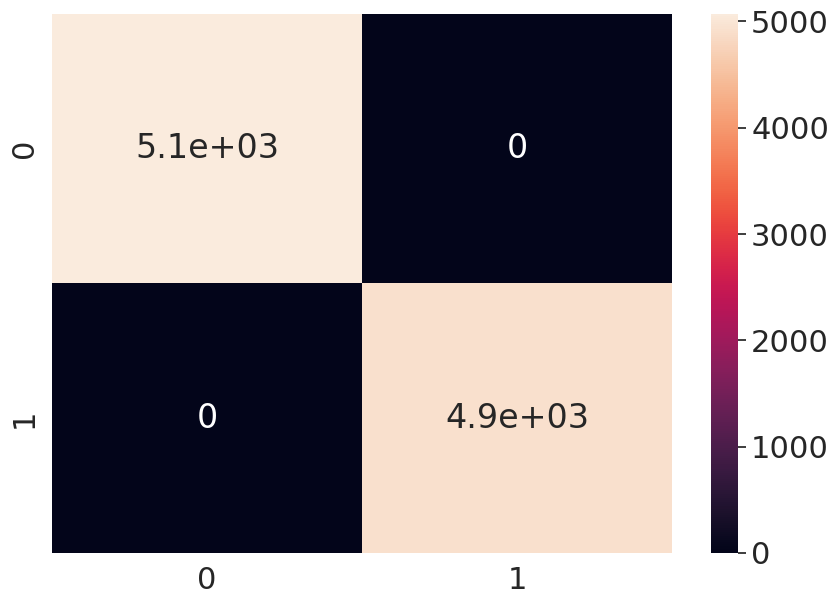

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5072
           1       1.00      1.00      1.00      4928

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [46]:
print('Logistic accuracy:: %0.3f (+/- %0.3f)'%(accuracies.mean(), accuracies.std() * 2))

Logistic accuracy:: 1.000 (+/- 0.000)


## Formatting the Final Results

In [47]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [48]:
final_results['predicted_results'] = y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop = True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,1
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
